# To Explore The Business Analytics

In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [25]:
data.shape

(9994, 12)

In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Cleaning The Data

### Checking Null counts

In [12]:
pd.DataFrame(data.isnull().sum(),columns=['Missing Vlaues'])

,Missing Vlaues
Ship Mode,0
Segment,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0
Quantity,0


In [16]:
data.duplicated()
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [18]:
data.duplicated().sum()

17

In [19]:
data.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [21]:
df=data.drop_duplicates()
df


,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [22]:
dt=data.sort_values(by='Sales',ascending=False)
dt.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856


In [24]:
dt.shape

(9994, 12)

In [31]:
import plotly
import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
px.bar(dt,x='Region',y='Sales')

# Calculating Z-score Values

In [34]:
dt['z-score'] = (dt.Sales-dt.Sales.mean())/dt.Sales.std()
dt.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.954750
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.709952
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.094200
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.601598
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.478448


In [35]:
dt[dt['z-score']>3]
dt.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.954750
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.709952
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.094200
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.601598
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.478448


In [36]:
dt.shape

(9994, 13)

# Removing Outliers

In [37]:
dt_no_outliers=dt[dt['z-score']<3]
dt_no_outliers.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
6467,Standard Class,Home Office,Providence,Rhode Island,2908,East,Office Supplies,Storage,2079.400,5,0.0,582.2320,2.967600
949,Standard Class,Home Office,Philadelphia,Pennsylvania,19120,East,Furniture,Tables,2065.320,12,0.4,-619.5960,2.945008
3628,Standard Class,Consumer,Seattle,Washington,98103,West,Office Supplies,Binders,2060.744,7,0.2,643.9825,2.937666
3043,Same Day,Home Office,Long Beach,California,90805,West,Furniture,Chairs,2054.272,8,0.2,256.7840,2.927282
8168,Standard Class,Home Office,Seattle,Washington,98105,West,Furniture,Tables,2036.860,7,0.0,366.6348,2.899344


In [38]:
new_dt=dt_no_outliers
new_dt.shape

(9867, 13)

# Scatterplot before removing the outliers

In [43]:
px.scatter(dt,x='Region',y='Sales',size='Sales')

In [41]:
px.scatter_matrix(new_dt,color='Region',title='Market',dimensions=['Sales', 'Quantity', 'Discount', 'Profit'])

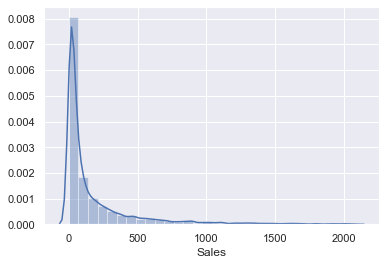

In [44]:
sns.distplot(new_dt['Sales'],bins=30)

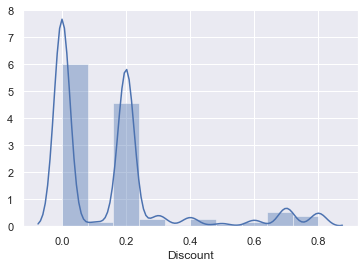

In [45]:
sns.distplot(new_dt['Discount'],bins=10)

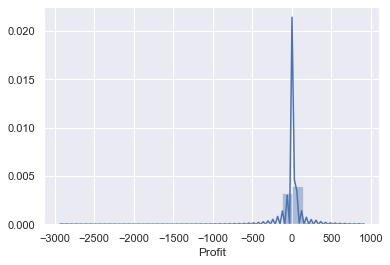

In [46]:
sns.distplot(new_dt['Profit'],bins=30)

In [47]:
new_dt = new_dt.drop(['z-score','Postal Code'],axis=1)

# Correlation Matrix

In [48]:
new_dt.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.255552,-0.041876,0.271660
Quantity,0.255552,1.000000,0.010904,0.076426
Discount,-0.041876,0.010904,1.000000,-0.355820
Profit,0.271660,0.076426,-0.355820,1.000000


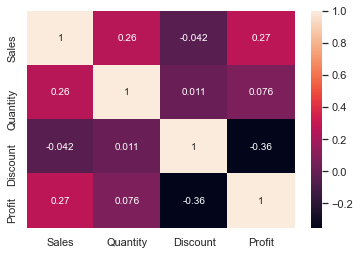

In [49]:
sns.heatmap(new_dt.corr(),annot=True)

### Correlation between sales and profit,uantity and sales are major

# Visualizing the data

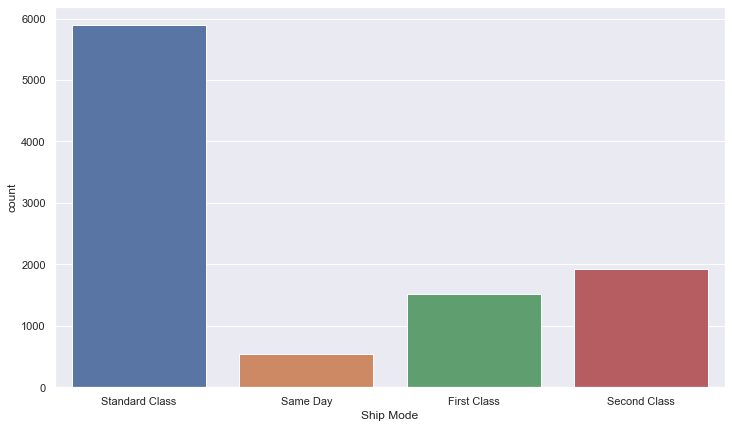

In [50]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["Ship Mode"])
plt.show()

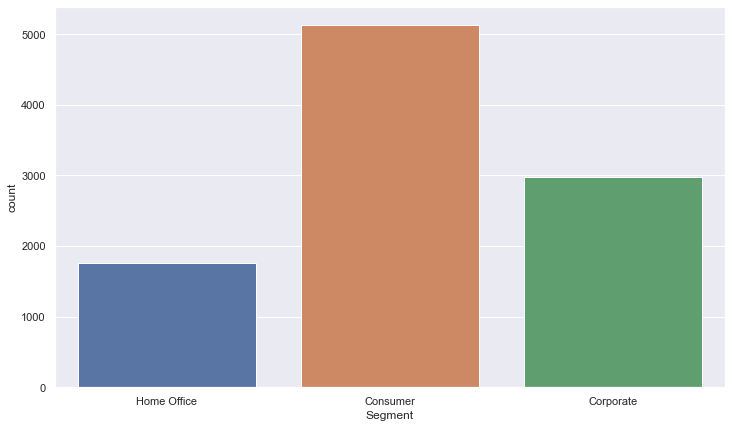

In [51]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["Segment"])
plt.show()

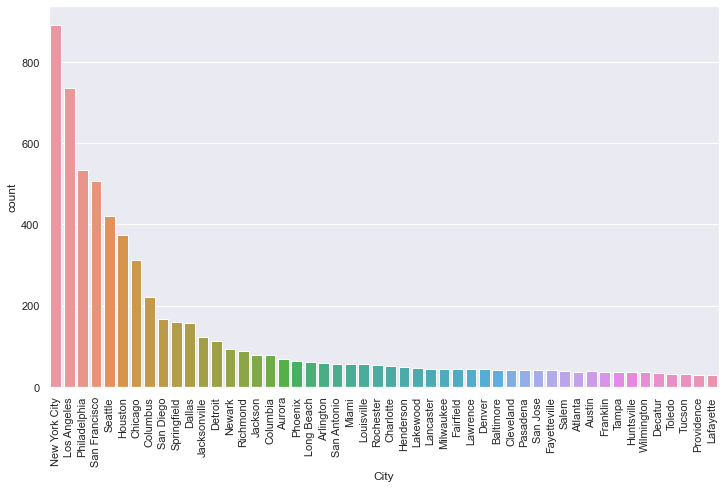

In [52]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["City"],order=(data['City'].value_counts().head(50)).index)
plt.xticks(rotation = 90)
plt.show()

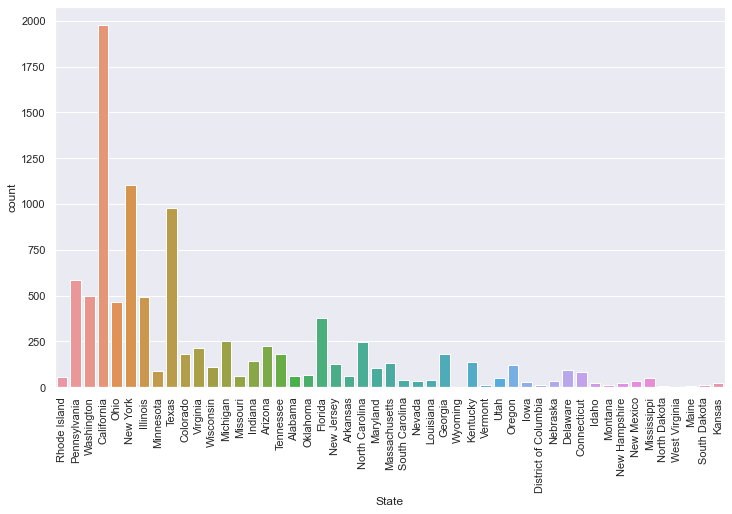

In [53]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["State"])
plt.xticks(rotation = 90)
plt.show()

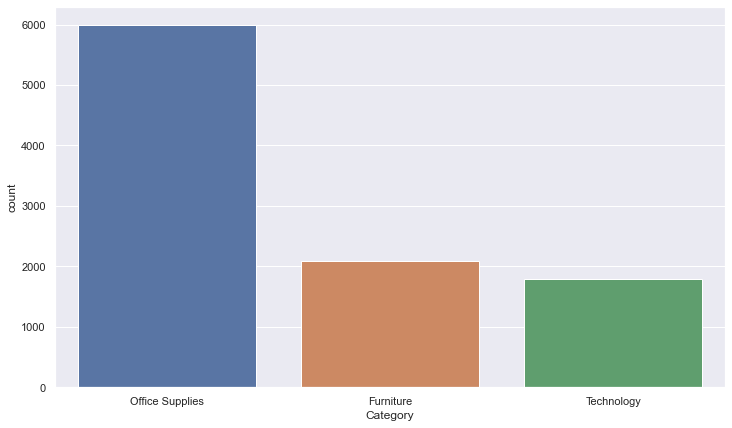

In [54]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["Category"])
plt.show()

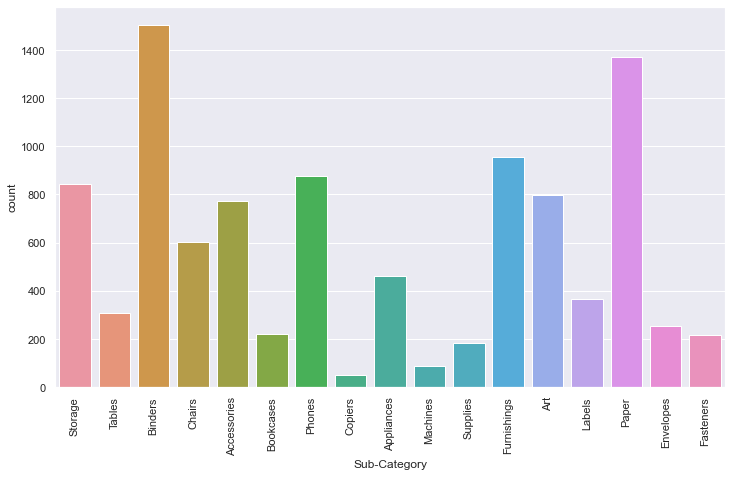

In [55]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_dt["Sub-Category"])
plt.xticks(rotation = 90)
plt.show()

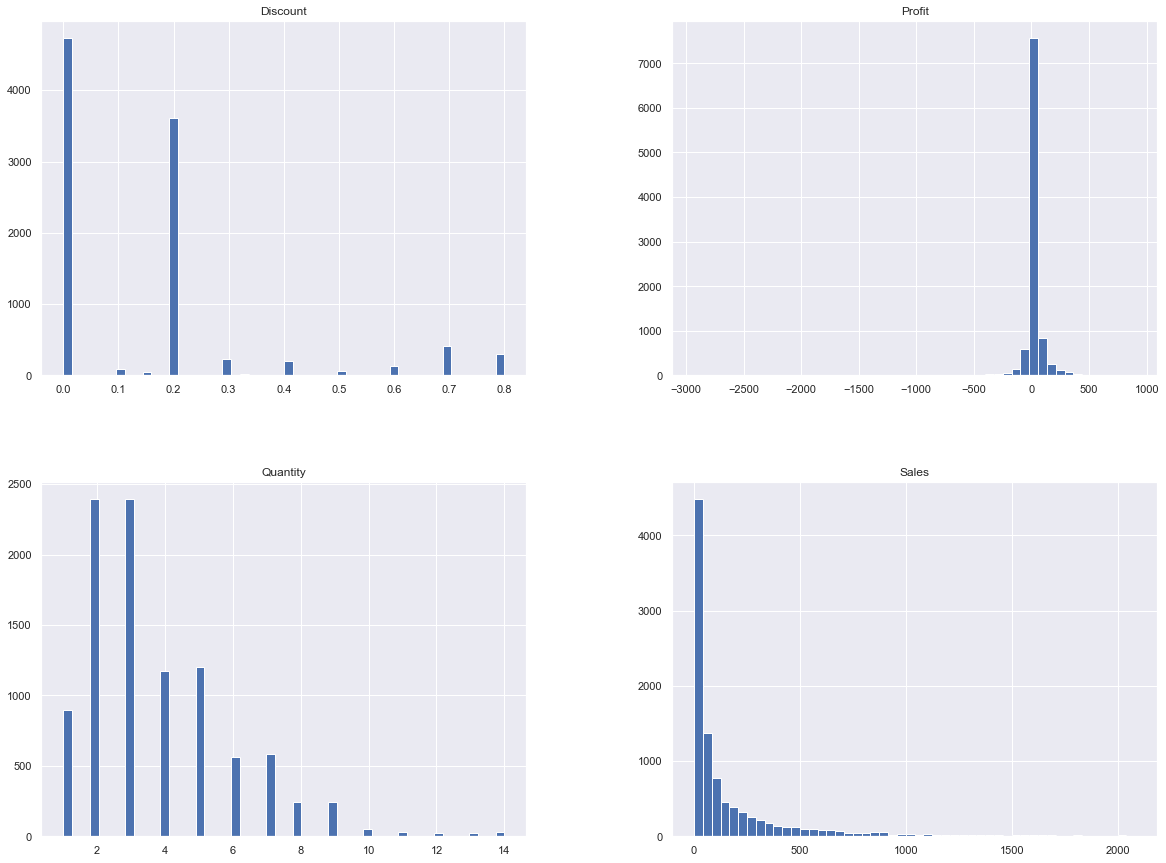

In [58]:
new_dt.hist(bins=50,figsize=(20,15))
plt.show()

# Top 10 Profitable cities

In [59]:
dt_top_10_cities = new_dt.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
dt_top_10_cities.head(10)

,City,Profit
329,New York City,34897.5783
266,Los Angeles,24592.5499
452,Seattle,17581.2251
438,San Francisco,15678.3905
123,Detroit,6854.4448
94,Columbus,5132.7195
437,San Diego,4969.8885
407,Richmond,4872.7471
215,Jackson,4688.6484
93,Columbia,4335.1267


In [60]:
dt_top_10_cities = new_dt.groupby("City")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
dt_top_10_cities.head(10)

,City,Discount
374,Philadelphia,174.10
207,Houston,141.82
80,Chicago,120.10
109,Dallas,56.30
266,Los Angeles,53.15
329,New York City,49.70
94,Columbus,38.50
216,Jacksonville,35.15
438,San Francisco,33.60
452,Seattle,27.00


# Top 10 profitable sub-category

In [61]:
dt_top_10_sub_categories = new_dt.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
dt_top_10_sub_categories.head(10)

,Sub-Category,Profit
0,Accessories,39503.4923
13,Phones,37886.6451
12,Paper,34053.5693
5,Chairs,21989.2644
14,Storage,19864.5829
1,Appliances,14633.8139
6,Copiers,13974.6680
9,Furnishings,13059.1436
7,Envelopes,6964.1767
2,Art,6527.7870


In [62]:
dt_top_10_sub_categories = new_dt.groupby("Sub-Category").Discount.sum().reset_index().sort_values(by="Discount",ascending=False)
dt_top_10_sub_categories.head(10)

,Sub-Category,Discount
3,Binders,564.40
13,Phones,136.20
9,Furnishings,132.40
5,Chairs,103.10
12,Paper,102.60
16,Tables,82.15
1,Appliances,77.60
14,Storage,63.20
0,Accessories,60.80
2,Art,59.60


# Top 2 Sales region

In [63]:
dt_top_10_region = new_dt.groupby("Region").Sales.sum().reset_index().sort_values(by="Sales",ascending=False)
dt_top_10_region.head(2)

,Region,Sales
3,West,592610.3555
1,East,506698.1940


# Conclusion

In [64]:
Gp1 = new_dt.groupby(['Category']).Discount.sum().sort_values(ascending = False).reset_index()
Gp2 =new_dt.groupby(['Category']).Profit.sum().sort_values(ascending = False).reset_index()
merge1= pd.merge(Gp1, Gp2, how='right',on='Category')
merge1.rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'},inplace = True)
merge1

,Category,Overall_Discount,Overall_Profit
0,Office Supplies,944.80,90263.5534
1,Furniture,364.42,14210.0055
2,Technology,235.40,86961.0770


# Companies offering more discounts on office supplies and Furnitures

## Comapring discounts and profits based on the regions

In [65]:
Gp3 = new_dt.groupby(['Region']).Discount.sum().sort_values(ascending = False).reset_index()
Gp4 =new_dt.groupby(['Region']).Profit.sum().sort_values(ascending = False).reset_index()
merge2= pd.merge(Gp3, Gp4, how='right',on='Region')
merge2.rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'},inplace = True)
merge2

,Region,Overall_Discount,Overall_Profit
0,Central,554.82,15819.1309
1,East,409.80,53824.9307
2,West,344.35,83951.7150
3,South,235.65,37838.8593


## Companies in central region gives more discount but less profits where as the western region provides the highest profit